<a href="https://colab.research.google.com/github/xAn-x/Duplicate-Question-Pairs/blob/master/Duplicate_Question_Pairs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# prompt: mount to drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Import Dataset
dataset_dir="/content/drive/MyDrive/Datasets/quora-question-pairs/questions.csv"

In [ ]:
ds=pd.read_csv(dataset_dir)
ds.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404351 entries, 0 to 404350
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404351 non-null  int64 
 1   qid1          404351 non-null  int64 
 2   qid2          404351 non-null  int64 
 3   question1     404350 non-null  object
 4   question2     404349 non-null  object
 5   is_duplicate  404351 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [ ]:
ds.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [ ]:
ds.duplicated().sum()

0

In [ ]:
ds.dropna(inplace=True)

In [ ]:
# This determine that a question is used in multiple rows : NOTHING MUCH

print("No of dups in colums question1:",ds[["qid1"]].duplicated().sum())
print("No of dups in colums question2:",ds["qid2"].duplicated().sum())

No of dups in colums question1: 5017
No of dups in colums question2: 6410


In [ ]:
ds=ds[["question1","question2","is_duplicate"]]

In [ ]:
ds.sample(10)

,question1,question2,is_duplicate
33130,How reliable is UPS Freight?,Where can I find the freight flight schedule o...,0
152980,Which DSLR camera is best under 35000rs?,Which DSLR camera is the best?,0
109634,What is the difference between a database and ...,What is similarity between data base and data ...,1
208703,Which industry/ sector will benefit the most a...,How corporates be benefited by GST?,0
214908,How do you become immortal?,"If you could, would you become immortal? Why?",0
340276,How can we remove virus manually from a PC?,"How do I remove Virus, Malware and Spyware fro...",0
391897,Why Can't India build world class weapons?,Why does the DRDO fail to develop a world clas...,1
109334,What are 10 most important skills that an expe...,Where can I start carb cycling from? What are ...,0
353877,I masturbate in such position that when semen'...,What are the best ways to stop or reduce the f...,0
158187,From what website can you get free temporary n...,Our app uses free SMS verification for user re...,0


## ```Data Preprocessing```

In [ ]:
import re

In [ ]:
# Decontracting words
# https://en.wikipedia.org/wiki/Wikipedia%3aList_of_English_contractions
# https://stackoverflow.com/a/19794953
contractions = {
    "ain't": "am not",
    "aren't": "are not",
    "can't": "can not",
    "can't've": "can not have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
  }

In [ ]:
def preprocess(q):
    q = str(q).lower().strip()

    # Replace certain special characters with their string equivalents
    q = q.replace('%', ' percent')
    q = q.replace('$', ' dollar ')
    q = q.replace('₹', ' rupee ')
    q = q.replace('€', ' euro ')
    q = q.replace('@', ' at ')

    # Replacing some numbers with string equivalents (not perfect, can be done better to account for more cases)
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)

    q_decontracted = []

    for word in q.split():
        if word in contractions:
            word = contractions[word]

        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve", " have")
    q = q.replace("n't", " not")
    q = q.replace("'re", " are")
    q = q.replace("'ll", " will")


    # Remove punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern, ' ', q).strip()


    return q

In [ ]:
ds["ques1"]=ds["question1"].apply(preprocess)
ds["ques2"]=ds["question2"].apply(preprocess)

In [ ]:
ds.sample(7)

,question1,question2,is_duplicate,ques1,ques2
166490,What would Melisandre do if Jon became king?,What would Ser Davos do if Jon became king?,0,what would melisandre do if jon became king,what would ser davos do if jon became king
236393,How do I see who's viewed my Instagram profile?,Is it true that you can see who’s viewed your ...,1,how do i see who is viewed my instagram profile,is it true that you can see who s viewed your ...
19015,Why do I feel more tired after a nap?,Why are you tired after you wake up from a nap?,1,why do i feel more tired after a nap,why are you tired after you wake up from a nap
64659,If you had sex on the first week of the month ...,If I have sex on the day of my ovulation and I...,1,if you had sex on the first week of the month ...,if i have sex on the day of my ovulation and i...
111906,Where can I buy grey market home theater syste...,Is it hard to transfer to sdsu for finance major?,0,where can i buy grey market home theater syste...,is it hard to transfer to sdsu for finance major
273606,How significant would the damage to our enviro...,Can the environment survive a Trump presidency?,1,how significant would the damage to our enviro...,can the environment survive a trump presidency
101697,Daniel Ek: Why isn't Spotify available in Indi...,When will Spotify launch it's services in INDIA?,1,daniel ek why is not spotify available in ind...,when will spotify launch it is services in india


## ```Feature Engineering```

We need to create some special columns which may hel us in better determining if 2 question are similar or not

**Logical Features**

* No of words in a question
* Length of question
* No of common words
* Total distict words
* word share = No of common words / Total distinct words
* Longest Common substring


**Fuzzy Features**

``` It uses Levenshtein Distance to calculate the differences between sequences in a simple-to-use package.```

* fuzz.ratio
* fuzz.partial_ratio
* fuzz.token_sort_ratio

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

In [ ]:
stop_words=stopwords.words("english")
", ".join(stop_words)

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [ ]:
# We don't need words {like: no,nor,should,shouldn't,etc} as they will be removed while processing which might alter the meaning completely

selected_words="i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, only, own, same, so, than, too, very, s, t, can, will, just"
selected_stop_words=set(selected_words.split(", "))

In [ ]:
stemmer=PorterStemmer()

In [ ]:
def clean_up(sentence):
  # remove stopwords + Tokkenize
  tokkenized_sentence=[word for word in word_tokenize(sentence) if word not in selected_stop_words]

  # Stemming
  return [stemmer.stem(word) for word in tokkenized_sentence]

In [ ]:
ds["ques1"]=ds["ques1"].apply(clean_up)
ds["ques2"]=ds["ques2"].apply(clean_up)

In [ ]:
ds.sample(5,random_state=42)

,question1,question2,is_duplicate,ques1,ques2
371032,Do people realize that you can send marijuana ...,How do you send weed through the mail?,0,"[peopl, realiz, send, marijuana, overnight, ca...","[send, weed, mail]"
263498,How can rock music be brought back?,What would it take for rock music to make a co...,1,"[rock, music, brought, back]","[would, take, rock, music, make, come, back]"
111008,Why does one feel relaxed after smoking a join...,How do I sober up quickly after smoking weed/m...,0,"[one, feel, relax, smoke, joint, marijuana]","[sober, quickli, smoke, weed, marijuana, drug]"
75665,How to gain weight ?,How do I gain weight fast but still be healthy?,1,"[gain, weight]","[gain, weight, fast, still, healthi]"
52376,Is porn bad for men?,Can I become a porn fan without getting addicted?,0,"[porn, bad, men]","[becom, porn, fan, without, get, addict]"


### ```LOGICAL-Features```

In [ ]:
# Length of questions
ds["q1_len"]=ds["ques1"].apply(lambda q:len(" ".join(q)))
ds["q2_len"]=ds["ques2"].apply(lambda q:len(" ".join(q)))

ds.head(2)

,question1,question2,is_duplicate,ques1,ques2,q1_len,q2_len
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,"[step, step, guid, invest, share, market, india]","[step, step, guid, invest, share, market]",40,34
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,"[stori, kohinoor, koh, noor, diamond]","[would, happen, indian, govern, stole, kohinoo...",31,63


In [ ]:
# Length of Question
ds["total_words_in_ques1"]=ds["ques1"].apply(lambda q:len(q))
ds["total_words_in_ques2"]=ds["ques2"].apply(lambda q:len(q))

ds.head(2)

,question1,question2,is_duplicate,ques1,ques2,q1_len,q2_len,total_words_in_ques1,total_words_in_ques2
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,"[step, step, guid, invest, share, market, india]","[step, step, guid, invest, share, market]",40,34,7,6
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,"[stori, kohinoor, koh, noor, diamond]","[would, happen, indian, govern, stole, kohinoo...",31,63,5,10


In [ ]:
# No of distinct words
ds["no_of_distinct_words_in_ques1"]=ds["ques1"].apply(lambda q:len(set(q)))
ds["no_of_distinct_words_in_ques2"]=ds["ques2"].apply(lambda q:len(set(q)))

ds.head(2)

,question1,question2,is_duplicate,ques1,ques2,q1_len,q2_len,total_words_in_ques1,total_words_in_ques2,no_of_distinct_words_in_ques1,no_of_distinct_words_in_ques2
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,"[step, step, guid, invest, share, market, india]","[step, step, guid, invest, share, market]",40,34,7,6,6,5
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,"[stori, kohinoor, koh, noor, diamond]","[would, happen, indian, govern, stole, kohinoo...",31,63,5,10,5,10


In [ ]:
# Common words
ds.loc[:, "no_of_common_words"] = ds.apply(lambda row: len(set(row["ques1"] + row["ques2"])), axis=1)
ds.head(2)

,question1,question2,is_duplicate,ques1,ques2,q1_len,q2_len,total_words_in_ques1,total_words_in_ques2,no_of_distinct_words_in_ques1,no_of_distinct_words_in_ques2,no_of_common_words
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,"[step, step, guid, invest, share, market, india]","[step, step, guid, invest, share, market]",40,34,7,6,6,5,6
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,"[stori, kohinoor, koh, noor, diamond]","[would, happen, indian, govern, stole, kohinoo...",31,63,5,10,5,10,11


In [ ]:
ds["total_no_of_words"]=ds["total_words_in_ques1"]+ds["total_words_in_ques2"]
ds.head()

,question1,question2,is_duplicate,ques1,ques2,q1_len,q2_len,total_words_in_ques1,total_words_in_ques2,no_of_distinct_words_in_ques1,no_of_distinct_words_in_ques2,no_of_common_words,total_no_of_words
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,"[step, step, guid, invest, share, market, india]","[step, step, guid, invest, share, market]",40,34,7,6,6,5,6,13
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,"[stori, kohinoor, koh, noor, diamond]","[would, happen, indian, govern, stole, kohinoo...",31,63,5,10,5,10,11,15
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0,"[increas, speed, internet, connect, use, vpn]","[internet, speed, increas, hack, dn]",38,30,6,5,6,5,8,11
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0,"[mental, lone, solv]","[find, remaind, math, 23, 24, math, divid, 24,...",16,40,3,9,3,6,9,12
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0,"[one, dissolv, water, quikli, sugar, salt, met...","[fish, would, surviv, salt, water]",57,28,10,5,10,5,13,15


In [ ]:
ds["word_share"]=round(ds["total_no_of_words"]/ds['no_of_common_words'],3)
ds.head(2)

,question1,question2,is_duplicate,ques1,ques2,q1_len,q2_len,total_words_in_ques1,total_words_in_ques2,no_of_distinct_words_in_ques1,no_of_distinct_words_in_ques2,no_of_common_words,total_no_of_words,word_share
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,"[step, step, guid, invest, share, market, india]","[step, step, guid, invest, share, market]",40,34,7,6,6,5,6,13,2.167
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,"[stori, kohinoor, koh, noor, diamond]","[would, happen, indian, govern, stole, kohinoo...",31,63,5,10,5,10,11,15,1.364


In [ ]:
!pip install distance

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.3/180.3 kB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for distance: filename=Distance-0.1.3-py3-none-any.whl size=16258 sha256=cf0aa93039ac307c574cbe07aa976476701225bf13cfc03284e1302efe173f5d
  Stored in directory: /root/.cache/pip/wheels/e8/bb/de/f71bf63559ea9a921059a5405806f7ff6ed612a9231c4a9309
Successfully built distance


In [ ]:
import distance
def fetch_length_features(row):

    q1 = row['question1']
    q2 = row['question2']

    length_features = [0.0]*3

    # Converting the Sentence into Tokens:
    q1_tokens_len = row["total_words_in_ques1"]
    q2_tokens_len = row["total_words_in_ques2"]

    if q1_tokens_len == 0 or q2_tokens_len == 0:
        return length_features

    # Absolute length features
    length_features[0] = abs(q1_tokens_len - q2_tokens_len)

    #Average Token Length of both Questions
    length_features[1] = (q1_tokens_len + q2_tokens_len)/2

    # How it works : https://github.com/doukremt/distance/blob/master/distance/_lcsubstrings.py
    lcs_obj = distance.lcsubstrings(q1, q2,positions=True) # return (len,[start_pos,end_pos]) # O(n^2) where n is length of string
    length_features[2] = lcs_obj[0]

    return length_features

In [ ]:
length_features = ds.apply(fetch_length_features, axis=1)

ds['abs_len_diff'] = list(map(lambda x: x[0], length_features))
ds['mean_len'] = list(map(lambda x: x[1], length_features))
ds['longest_substr_len'] = list(map(lambda x: x[2], length_features))

## ```Fuzzy-Wuzzy Features```
* fuzz.ratio
* fuzz.partial_ratio
* fuzz.token_sort_ratio

In [ ]:
!pip install fuzzywuzzy

In [ ]:
from fuzzywuzzy import fuzz

/usr/local/lib/python3.10/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [ ]:
# This might take some time as it is somewhat computationally  expensive

In [ ]:
ds.loc[:,"fuzzy_ratio"]=ds.apply(lambda row:fuzz.ratio(row["ques1"],row["ques2"]),axis=1)
ds.loc[:,"fuzzy_partial_ratio"]=ds.apply(lambda row:fuzz.partial_ratio(row["ques1"],row["ques2"]),axis=1)
ds.loc[:,"fuzzy_token_sort_ratio"]=ds.apply(lambda row:fuzz.token_sort_ratio(row["ques1"],row["ques2"]),axis=1)
ds.loc[:,"fuzzy_partial_token_sort_ratio"]=ds.apply(lambda row:fuzz.partial_token_sort_ratio(row["ques1"],row["ques2"]),axis=1)

ds.head(2)

,question1,question2,is_duplicate,ques1,ques2,q1_len,q2_len,total_words_in_ques1,total_words_in_ques2,no_of_distinct_words_in_ques1,no_of_distinct_words_in_ques2,no_of_common_words,total_no_of_words,word_share,fuzzy_ratio,fuzzy_partial_ratio,fuzzy_token_sort_ratio,fuzzy_partial_token_sort_ratio
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,"[step, step, guid, invest, share, market, india]","[step, step, guid, invest, share, market]",40,34,7,6,6,5,6,13,2.167,92,98,92,91
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,"[stori, kohinoor, koh, noor, diamond]","[would, happen, indian, govern, stole, kohinoo...",31,63,5,10,5,10,11,15,1.364,64,91,62,84


## ```saving my new updated-dataset```

In [ ]:
dir_path="/content/drive/MyDrive/Datasets/quora-question-pairs/updated-question.csv"
ds.to_csv(dir_path,index=False)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# ---Loading updated ds--
dir_path="/content/drive/MyDrive/Datasets/quora-question-pairs/updated-question.csv"

df=pd.read_csv(dir_path)

In [ ]:
df.sample(5,random_state=31)

,question1,question2,is_duplicate,ques1,ques2,q1_len,q2_len,total_words_in_ques1,total_words_in_ques2,no_of_distinct_words_in_ques1,...,no_of_common_words,total_no_of_words,word_share,fuzzy_ratio,fuzzy_partial_ratio,fuzzy_token_sort_ratio,fuzzy_partial_token_sort_ratio,abs_len_diff,mean_len,longest_substr_len
98535,What is the best thing you learned on Quora?,What is the best thing you've ever learned on ...,1,"['best', 'thing', 'learn', 'quora']","['best', 'thing', 'ever', 'learn', 'quora']",22,27,4,5,4,...,5,9,1.800,90,77,90,86,1.0,4.5,26.0
46982,Why am I getting Likes from people in India wh...,Can I target an email list and people that hav...,0,"['get', 'like', 'peopl', 'india', 'ad', 'campa...","['target', 'email', 'list', 'peopl', 'not', 'l...",48,58,9,10,8,...,13,19,1.462,40,42,53,48,1.0,9.5,8.0
213754,"What is the meaning of the word ""soundacious""?",What is the meaning of word 'vensunda'?,0,"['mean', 'word', 'soundaci']","['mean', 'word', 'havensunda']",18,20,3,3,3,...,4,6,1.500,86,82,47,67,0.0,3.0,23.0
364762,How long does it take for an avid weed smoker ...,"If I eat a pot cookie, how long until I'm able...",1,"['long', 'take', 'avid', 'weed', 'smoker', 'pa...","['eat', 'pot', 'cooki', 'long', 'abl', 'pass',...",46,37,9,8,9,...,13,17,1.308,54,52,63,65,1.0,8.5,17.0
237193,Why do Gremlins multiply in snow?,Would women stare at a man's pecs if they foun...,0,"['gremlin', 'multipli', 'snow']","['would', 'women', 'stare', 'man', 'pec', 'fou...",21,39,3,7,3,...,10,10,1.000,37,48,23,39,4.0,5.0,3.0


##```Visualization```

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

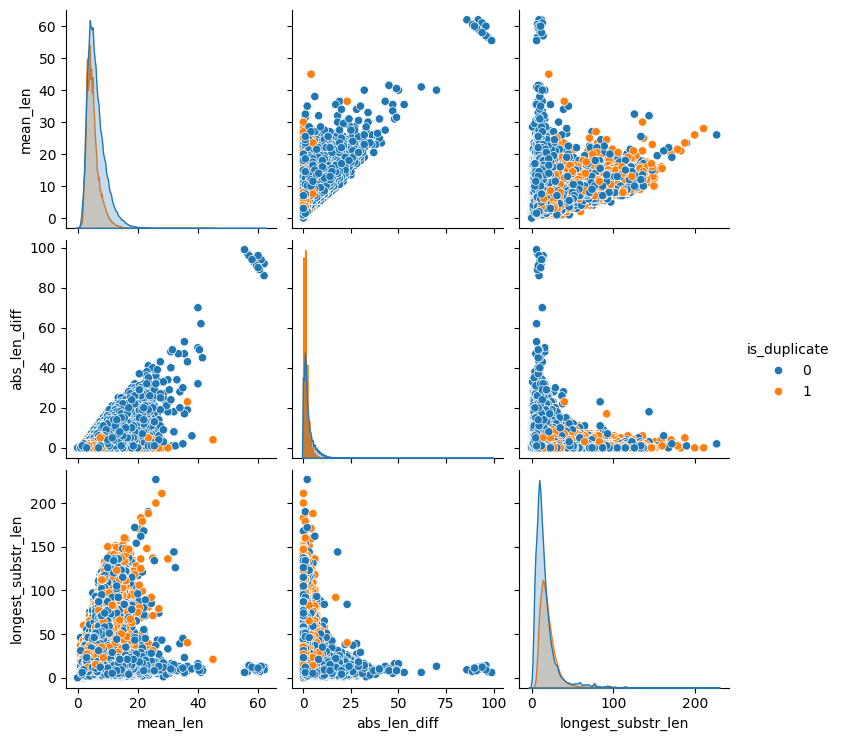

In [ ]:
sns.pairplot(df[['mean_len', 'abs_len_diff','longest_substr_len', 'is_duplicate']],hue='is_duplicate')

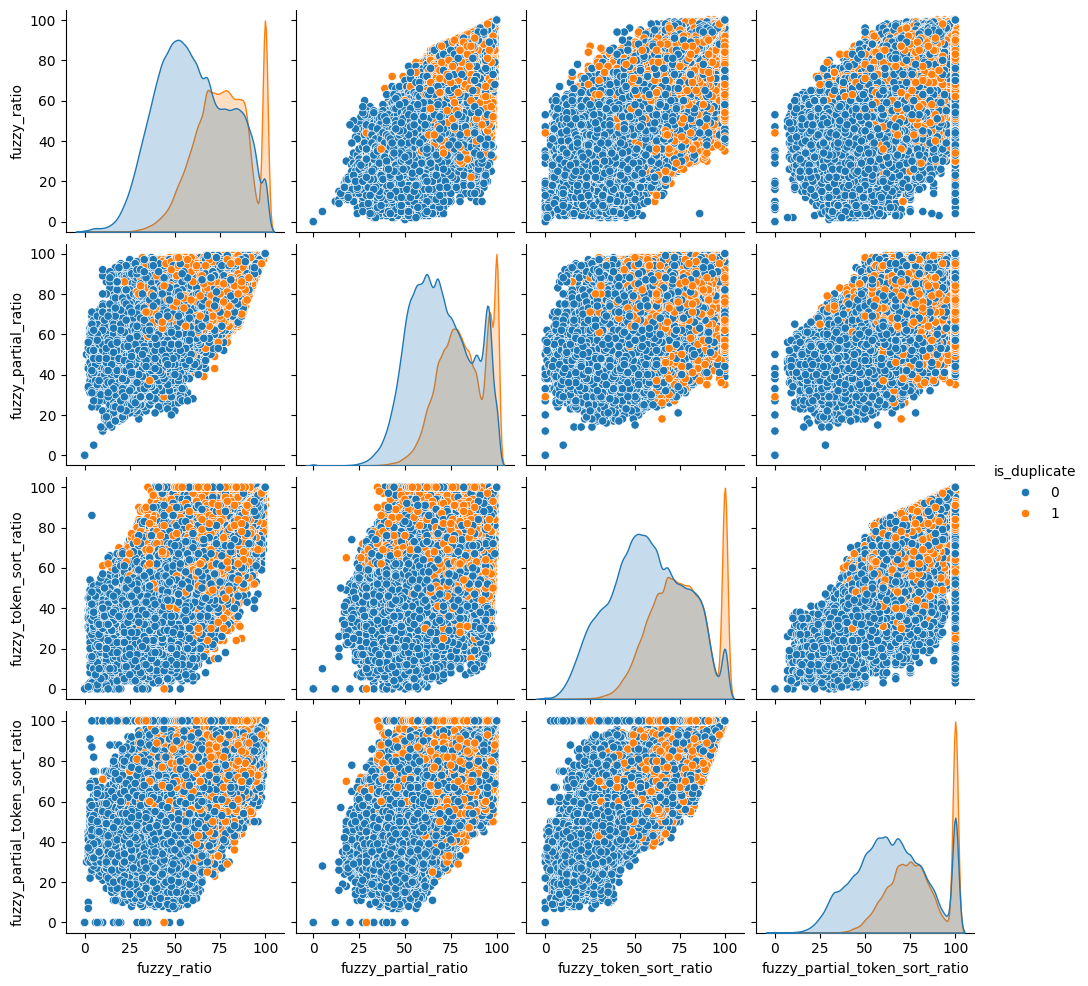

In [ ]:
sns.pairplot(df[['fuzzy_ratio', 'fuzzy_partial_ratio','fuzzy_token_sort_ratio','fuzzy_partial_token_sort_ratio', 'is_duplicate']],hue='is_duplicate')

## ```Training Models```

In [ ]:
type(df["ques1"][0])

str

In [ ]:
import ast

In [ ]:
def mergeQuestions(row):
  q1,q2=ast.literal_eval(row["ques1"]),ast.literal_eval(row["ques2"])
  return " ".join(q1+q2)

In [ ]:
df.loc[:,"merged_ques"]=df.apply(lambda row:mergeQuestions(row),axis=1)
df.head(2)

,question1,question2,is_duplicate,ques1,ques2,q1_len,q2_len,total_words_in_ques1,total_words_in_ques2,no_of_distinct_words_in_ques1,...,total_no_of_words,word_share,fuzzy_ratio,fuzzy_partial_ratio,fuzzy_token_sort_ratio,fuzzy_partial_token_sort_ratio,abs_len_diff,mean_len,longest_substr_len,merged_ques
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0,"['step', 'step', 'guid', 'invest', 'share', 'm...","['step', 'step', 'guid', 'invest', 'share', 'm...",40,34,7,6,6,...,13,2.167,92,98,92,91,1.0,6.5,56.0,step step guid invest share market india step ...
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0,"['stori', 'kohinoor', 'koh', 'noor', 'diamond']","['would', 'happen', 'indian', 'govern', 'stole...",31,63,5,10,5,...,15,1.364,64,91,62,84,5.0,7.5,23.0,stori kohinoor koh noor diamond would happen i...


In [ ]:
type(df["merged_ques"][0])

str

In [ ]:
## Divinding dataset into a sample dataset

In [ ]:
SAMPLE_SIZE=100_000

In [ ]:
sample_df=df.sample(SAMPLE_SIZE,random_state=42)

sample_df.head(2)

,question1,question2,is_duplicate,ques1,ques2,q1_len,q2_len,total_words_in_ques1,total_words_in_ques2,no_of_distinct_words_in_ques1,...,total_no_of_words,word_share,fuzzy_ratio,fuzzy_partial_ratio,fuzzy_token_sort_ratio,fuzzy_partial_token_sort_ratio,abs_len_diff,mean_len,longest_substr_len,merged_ques
371029,Do people realize that you can send marijuana ...,How do you send weed through the mail?,0,"['peopl', 'realiz', 'send', 'marijuana', 'over...","['send', 'weed', 'mail']",57,14,8,3,8,...,11,1.100,32,54,31,64,5.0,5.5,9.0,peopl realiz send marijuana overnight carrier ...
263496,How can rock music be brought back?,What would it take for rock music to make a co...,1,"['rock', 'music', 'brought', 'back']","['would', 'take', 'rock', 'music', 'make', 'co...",23,36,4,7,4,...,11,1.375,64,69,58,65,3.0,5.5,12.0,rock music brought back would take rock music ...


In [ ]:
MAX_FEATURES=3500

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Fitting to text
vectorizer = TfidfVectorizer(lowercase=False,max_features=MAX_FEATURES)

# One array won't fit in memory try using np.vstack to divide into multple smaller arrays
q_arr=vectorizer.fit_transform(sample_df["merged_ques"]).toarray()

In [ ]:
q_arr[0]

array([0.        , 0.        , 0.        , ..., 0.29764649, 0.        ,
       0.        ])

In [ ]:
q_arr.shape,sample_df.shape

((100000, 3500), (100000, 22))

In [ ]:
# merge all these cols "is_duplicate	ques1	ques2	q1_len	q2_len	total_words_in_ques1	total_words_in_ques2	no_of_distinct_words_in_ques1	...	total_no_of_words	word_share	fuzzy_ratio	fuzzy_partial_ratio	fuzzy_token_sort_ratio	fuzzy_partial_token_sort_ratio	abs_len_diff	mean_len	longest_substr_len	merged_ques" of data frames and thes sparsed question array to form one single fnal_df
df1 = sample_df[['is_duplicate', 'q1_len', 'q2_len', 'total_words_in_ques1', 'total_words_in_ques2', 'no_of_distinct_words_in_ques1', 'no_of_distinct_words_in_ques2', 'no_of_common_words', 'total_no_of_words', 'word_share', 'fuzzy_ratio', 'fuzzy_partial_ratio', 'fuzzy_token_sort_ratio', 'fuzzy_partial_token_sort_ratio', 'abs_len_diff', 'mean_len', 'longest_substr_len']]


# create a DataFrame from the sparse array
questions_df = pd.DataFrame(q_arr)

In [ ]:
# Reset Indexes
df1=df1.reset_index(drop=True)

In [ ]:
# Concatenate along axis:1
final_df=pd.concat([df1,questions_df],axis=1,ignore_index=True)

In [ ]:
final_df.shape

(100000, 3517)

In [ ]:
final_df.head(1)

,0,1,2,3,4,5,6,7,8,9,...,3507,3508,3509,3510,3511,3512,3513,3514,3515,3516
0,0,57,14,8,3,8,3,10,11,1.1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.297646,0.0,0.0


## ```Save final_df```

In [ ]:
dir_path="/content/drive/MyDrive/Datasets/quora-question-pairs"
final_df.to_csv(dir_path+"/final_df")

## ```Load final_df```

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dir_path="/content/drive/MyDrive/Datasets/quora-question-pairs"

num_rows_to_read=50_000
final_df=pd.read_csv(dir_path+"/final_df",nrows=num_rows_to_read)

In [ ]:
final_df.head(1)

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,3507,3508,3509,3510,3511,3512,3513,3514,3515,3516
0,0,0,57,14,8,3,8,3,10,11,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.297646,0.0,0.0


In [ ]:
final_df=final_df.iloc[:,1:]

## ```Training Models```

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import classification_report
import numpy as np

In [ ]:
# Sample a subset of your data (e.g., 50,000 rows)
SUBSET_SIZE=25_000
df_sample = final_df.sample(n=SUBSET_SIZE, random_state=42)

In [ ]:
df_sample.shape

(25000, 3517)

In [ ]:
df_sample.head(5)

,0,1,2,3,4,5,6,7,8,9,...,3507,3508,3509,3510,3511,3512,3513,3514,3515,3516
33553,1,9,9,2,2,2,2,2,4,2.000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9427,0,93,76,17,14,16,13,26,31,1.192,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
199,0,31,37,5,6,5,6,8,11,1.375,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12447,0,29,23,5,4,5,4,6,9,1.500,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
39489,0,19,26,3,4,3,4,4,7,1.750,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_sample,y_sample=df_sample.iloc[:,1:].values,df_sample.iloc[:,0].values

In [ ]:
print("X_sample shape: {}".format(X_sample.shape))
print("y_sample shape: {}".format(y_sample.shape))

X_sample shape: (25000, 3516)
y_sample shape: (25000,)


In [ ]:
# Split the sample into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.2, random_state=42)

In [ ]:
# shape of train and test dataset

print('Shape of X_train: ', X_train.shape)
print('Shape of y_train: ', y_train.shape)

print('Shape of X_test: ', X_test.shape)
print('Shape of y_test: ', y_test.shape)


Shape of X_train:  (20000, 3516)
Shape of y_train:  (20000,)
Shape of X_test:  (5000, 3516)
Shape of y_test:  (5000,)


In [ ]:
X_train[0],y_train[0]

(array([18., 28.,  3., ...,  0.,  0.,  0.]), 0)

In [ ]:
# Define the parameter grid to search over for each model
rf_param_grid = {'n_estimators': [100, 200, 500], 'max_depth': [5, 10, 20]}
nb_param_grid = {'var_smoothing': np.logspace(0, -9, num=100)}
lr_param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'], 'max_iter': [100, 200, 500,1000,1200], 'class_weight': ['balanced']}
xgb_param_grid = {'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200]}

# Instantiate the models
rf = RandomForestClassifier()
nb = GaussianNB()
lr = LogisticRegression()
xgb = XGBClassifier()

# Create a dictionary to store the best parameters for each model
best_results_dict = {}

# Create a dictionary of models and their corresponding parameter grids
models = {'Random Forest': (rf, rf_param_grid),
          'Naive Bayes': (nb, nb_param_grid),
          'Logistic Regression': (lr, lr_param_grid),
          'XGBoost': (xgb, xgb_param_grid)}

In [ ]:
# Train and evaluate each model using GridSearchCV and cross-validation
for name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=2, n_jobs=-1)  # Reduce cv for faster training
    grid_search.fit(X_train, y_train)

    # Store the best parameters and best score in the dictionary
    best_results_dict[name] = {
        'best_params': grid_search.best_params_,
        'best_score': grid_search.best_score_,
        'best_model': grid_search.best_estimator_,
    }

    print(f"Best parameters for {name}: {grid_search.best_params_}")
    print(f"Best cross-validation score for {name}: {grid_search.best_score_:.3f}")

    # Evaluate on the test set
    y_pred = grid_search.predict(X_test)

    # Print the classification report
    print(f"Classification Report for {name}:")
    print(classification_report(y_test, y_pred))

    print(f"Test set score for {name}: {grid_search.score(X_test, y_test):.3f}")
    print("\n" + "="*40 + "\n")

Best parameters for Random Forest: {'max_depth': 20, 'n_estimators': 500}
Best cross-validation score for Random Forest: 0.734
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.74      0.93      0.82      3213
           1       0.76      0.41      0.53      1787

    accuracy                           0.74      5000
   macro avg       0.75      0.67      0.68      5000
weighted avg       0.74      0.74      0.72      5000

Test set score for Random Forest: 0.742


Best parameters for Naive Bayes: {'var_smoothing': 1.0}
Best cross-validation score for Naive Bayes: 0.660
Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.81      0.63      0.71      3213
           1       0.52      0.74      0.61      1787

    accuracy                           0.67      5000
   macro avg       0.67      0.68      0.66      5000
weighted avg       0.71      0.67      0.67  

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solve

Best parameters for Logistic Regression: {'C': 10, 'class_weight': 'balanced', 'max_iter': 1200, 'penalty': 'l2'}
Best cross-validation score for Logistic Regression: 0.748
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.85      0.75      0.80      3213
           1       0.63      0.76      0.69      1787

    accuracy                           0.76      5000
   macro avg       0.74      0.76      0.74      5000
weighted avg       0.77      0.76      0.76      5000

Test set score for Logistic Regression: 0.756




/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters for XGBoost: {'max_depth': 5, 'n_estimators': 200}
Best cross-validation score for XGBoost: 0.765
Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       0.80      0.87      0.84      3213
           1       0.73      0.62      0.67      1787

    accuracy                           0.78      5000
   macro avg       0.77      0.74      0.75      5000
weighted avg       0.78      0.78      0.78      5000

Test set score for XGBoost: 0.781




In [ ]:
# Print or save the dictionary for future reference
print("Best results dictionary:\n\n")
for k,v in best_results_dict.items():
  print("*"*20+f" Model:{k} "+"*"*20+"\n")
  print(f"Best parameters: {v['best_params']}")
  print(f"Best Accuracy score:  {v['best_score']}")
  print("\n")

Best results dictionary:


******************** Model:Random Forest ********************

Best parameters: {'max_depth': 20, 'n_estimators': 500}
Best Accuracy score:  0.7339


******************** Model:Naive Bayes ********************

Best parameters: {'var_smoothing': 1.0}
Best Accuracy score:  0.66035


******************** Model:Logistic Regression ********************

Best parameters: {'C': 10, 'class_weight': 'balanced', 'max_iter': 1200, 'penalty': 'l2'}
Best Accuracy score:  0.74785


******************** Model:XGBoost ********************

Best parameters: {'max_depth': 5, 'n_estimators': 200}
Best Accuracy score:  0.76475




In [ ]:
# If you want to save it to a file, you can use a method like pickle or json
# Example using pickle:
import pickle

path="/content/drive/MyDrive/Datasets/quora-question-pairs/best_params_dict.pkl"
with open(path, 'wb') as f:
    pickle.dump(best_results_dict, f)

In [ ]:
def processQuestions(q1,q2):
